# Here's Some Python Basics

### Python is a high level language

In [7]:
a = 1 #this is an integer
b = [1,2,3] #this is a list
print(a)
print(b)

1
[1, 2, 3]


### Jupyter is a cell-level programming editor

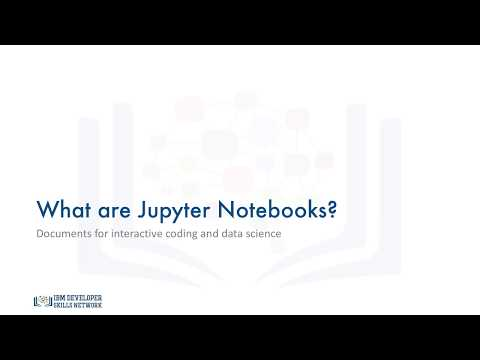

In [8]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('eJDxcR1V7Qg')

### It has syntax and style for writing code

In [12]:
print(1+1) #this adds two integers
print([1]+[1]+[1]+[1]) #this combines two lists
print(1*3) #this multiplies two integers
print([1]*3) #This duplicates a list

2
[1, 1, 1, 1]
3
[1, 1, 1]


### Many commands are familiar

In [16]:
if 1 == 1:
    print('True')
elif 1 == 2: print('nope')
for x in [1,2,3]: print(x)

True
1
2
3


### And there are some useful tricks

In [29]:
#Normal for loop
a = []
for x in [1,2,3,4,5]:
    a += [x**2]
print(a)
print(a[0]) #print first entry of a
print(a[-1]) #prints last entry in a
print(a[1:4]) #prints first 2 entries in a
print(a[::3]) #prints every 2nd entry in a

for x in ['a','b','c']:
    print(x)

#List comprehension
a = [x**2 for x in [1,2,3,4,5] if x!=3] #for loop and if statement wrapped into one
print(a)

[1, 4, 9, 16, 25]
1
25
[4, 9, 16]
[1, 16]
a
b
c
[1, 4, 16, 25]


### There are many resources to get familiarized

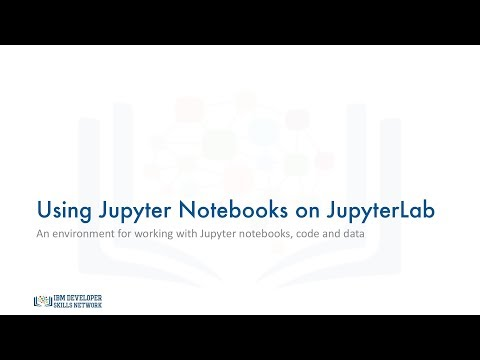

In [31]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('hKA7Wsx_354')

# DATA ANALYSIS DEMO

## Import Libraries

In [32]:
import pandas as pd
from os import listdir

## Define Files

In [33]:
cwd = '/home/jovyan/Data Analysis/'
Files = [x for x in listdir(cwd) if '.csv' in x]
Data = {x:[] for x in Files}
print(Files)
print(Data)

['Raw_Data1.csv', 'Raw_Data2.csv']
{'Raw_Data1.csv': [], 'Raw_Data2.csv': []}


## Load Data

In [40]:
for File in Files:
    Data[File] = pd.read_csv(cwd+File, header=None)
Data[Files[0]].head()
#print(Data)

,0,1,2
0,38.62,0.0000,0.093235
1,38.63,-18.5780,0.094939
2,38.64,-1.8142,0.093674
3,38.65,-11.3210,0.094641
4,38.66,-3.1931,0.094090


## Process Data

In [45]:
for File in Files:
    Height = 22400 if 'Data1' in File else 54900
    Area = 1
    Data[File]['Strain'] = Data[File][1]/Height
    Data[File]['Stress'] = Data[File][2]/Area
Data[Files[0]].head()

,0,1,2,Strain,Stress
0,38.62,0.0000,0.093235,0.000000,0.093235
1,38.63,-18.5780,0.094939,-0.000829,0.094939
2,38.64,-1.8142,0.093674,-0.000081,0.093674
3,38.65,-11.3210,0.094641,-0.000505,0.094641
4,38.66,-3.1931,0.094090,-0.000143,0.094090


## Plot Data

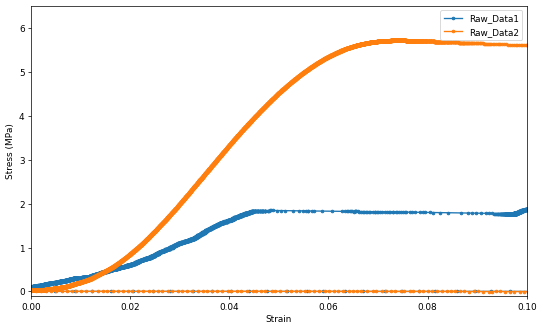

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(10,6), dpi=64)
ax = fig.gca()
for File in Files:
    ax.plot(Data[File]['Strain'],Data[File]['Stress'],'.-',label=File.replace('.csv',''))
    ax.set_xlabel('Strain')
    ax.set_ylabel('Stress (MPa)')
    ax.legend()
    ax.set_xlim(left=0, right=0.1)
    ax.set_ylim(bottom=-0.1, top=6.5)

## Find Modulus

In [57]:
import numpy as np
eStart = 0.025
eStop = 0.04
mFit = []
mX = [0, 0.07]
mY = []
for File in Files:
    Stress = Data[File]['Stress']
    Strain = Data[File]['Strain']
    e1 = next(i for i,x in enumerate(Strain) if x>eStart)
    e2 = next(i for i,x in enumerate(Strain) if x>eStop)
    mStrain = Strain[e1:e2]
    mStress = Stress[e1:e2]
    mFit += [np.polyfit(mStrain,mStress,1)]
    mY += [[x*mFit[-1][0] + mFit[-1][1] for x in mX]]
    print("Young's modulus: E = "+str(round(mFit[-1][0],2))+' MPa')

Young's modulus: E = 53.36 MPa
Young's modulus: E = 131.57 MPa


## Find Yield Strength

In [58]:
eOff = 0.002   #Strain offset for yield strength
mXOff = [m+eOff for m in mX]
yP = []
for i,File in enumerate(Files):
    Stress = Data[File]['Stress']
    Strain = Data[File]['Strain']
    m = mFit[i][0]; b = mFit[i][1]
    yP += [next(i for i,(x,y) in enumerate(zip(Stress,Strain)) if x < m*(y-eOff) + b)]
    print(Stress[yP[-1]])
    

1.8321
4.9042


## Find Area Under Curve

In [59]:
from numpy import argmax
for File in Files:
    Stress = Data[File]['Stress']
    Strain = Data[File]['Strain']
    eEnd = argmax(Strain)
    Area = sum((Strain[i+1]-Strain[i])*(Stress[i+1]+Stress[i])/2 for i in range(eEnd))
    print('Area = ' + str(round(Area,2)) + ' MPa')

Area = 1.19 MPa
Area = 2.41 MPa


## Plot The Fit

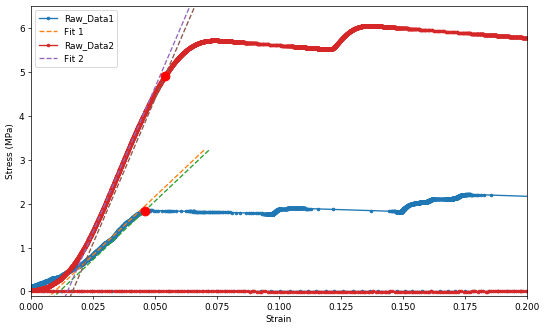

In [60]:
fig = plt.figure(1, figsize=(10,6), dpi=64)
ax = fig.gca()
for i,File in enumerate(Files):
    ax.plot(Data[File]['Strain'],Data[File]['Stress'],'.-',label=File.replace('.csv',''))    
    #ax.plot(mStrain,mStress,'y.')
    ax.plot(mX,mY[i],'--',label='Fit '+str(i+1))
    ax.plot(mXOff,mY[i],'--')
    ax.plot(Data[File]['Strain'][yP[i]],Data[File]['Stress'][yP[i]],'ro',ms=10)
    ax.set_xlabel('Strain')
    ax.set_ylabel('Stress (MPa)')
    ax.legend()
    ax.set_xlim(left=0, right=0.2)
    ax.set_ylim(bottom=-0.1, top=6.5)